In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def PenFun1(x, mu):
    if x > 0:
        f = x - mu*np.log(x)
        df = 1.0 - mu/x
        d2f = mu/(x*x)
        return f, df, d2f
    else:
        raise ValueError("x needs to be positive")


In [9]:
PenFun1(1,0.1)

(1.0, 0.9, 0.1)

In [14]:
def steepestdescent_method(alpha, fundfun, x0, *args):
    # Convert x0 to a numpy array for consistency
    x = np.array(x0, ndmin=1)
    is_scalar = x.size == 1

    # Solver settings and info
    maxit = 100 * (1 if is_scalar else len(x))
    tol = 1.0e-10

    # Initial iteration
    stat = {"converged": False, "nfun": 0, "iter": 0, "X": [x.copy()], "F": [], "dF": []}
    it = 0
    f, df, _ = fundfun(x, *args)
    converged = (np.linalg.norm(df, np.inf) <= tol)

    # Store data for plotting
    stat["F"].append(f)
    stat["dF"].append(df.copy())

    # Main loop of steepest descent
    while not converged and (it < maxit):
        it += 1
        
        # Steepest descent step
        # ================================================
        x = x - alpha * df  # Update step using steepest descent
        # ================================================

        f, df, _ = fundfun(x, *args)
        converged = (np.linalg.norm(df, np.inf) <= tol)

        # Store data for plotting
        stat['X'].append(x.copy())
        stat['F'].append(f)
        stat['dF'].append(df.copy())
        stat['nfun'] += 1

    stat['iter'] = it
    # Prepare return data
    if not converged:
        stat['converged'] = converged
        return None, stat
    stat['converged'] = converged
    # Convert the solution back to a scalar if the input was a scalar
    x_result = x[0] if is_scalar else x
    return x_result, stat



In [15]:
x0 = 0.1
alpha = 0.1
mu = 1.0
xopt, stat = steepestdescent_method(alpha, PenFun1, x0, mu)

In [18]:
xopt, stat

(1.0,
 {'converged': True,
  'nfun': 1,
  'iter': 1,
  'X': [array([0.1]), array([1.])],
  'F': [array([2.40258509]), array([1.])],
  'dF': [array([-9.]), array([0.])]})

k     xk              ek = |xk − x*|       |f′(xk)|             f(xk)               
0     0.1000000000    1.9000000000         19.0000000000        4.7051701860        
1     2.0000000000    0.0000000000         0.0000000000         0.6137056389        


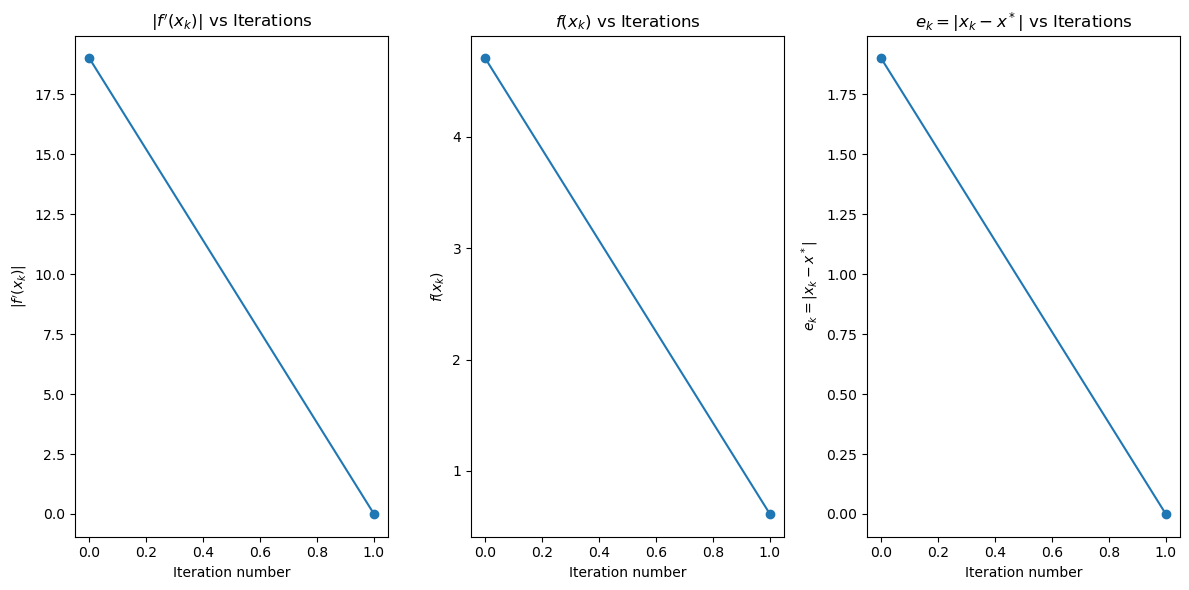

In [20]:
#################################### a ####################################

# Define the starting point and step length
x0 = 0.1
alpha = 0.1
mu = 2.0  # Example parameter for the PenFun1 function

# The true solution x* (for this specific case, you would normally solve f'(x)=0 analytically)
x_star = mu  # For PenFun1, f'(x)=0 leads to x_star = mu.

# Call the steepest descent method
xopt, stat = steepestdescent_method(alpha, PenFun1, x0, mu)

# Extract iteration information
iterations = stat["iter"]
X_values = np.array(stat["X"]).flatten()
F_values = np.array(stat["F"]).flatten()
dF_values = np.array([np.linalg.norm(df, np.inf) for df in stat["dF"]])
ek_values = np.abs(X_values - x_star)

# Print the table of results
print(f"{'k':<5} {'xk':<15} {'ek = |xk − x*|':<20} {'|f′(xk)|':<20} {'f(xk)':<20}")
for k in range(iterations + 1):
    print(f"{k:<5} {X_values[k]:<15.10f} {ek_values[k]:<20.10f} {dF_values[k]:<20.10f} {F_values[k]:<20.10f}")

# Plot |f′(xk)|, f(xk), and ek as functions of the iteration number
plt.figure(figsize=(12, 6))

# Plot |f′(xk)|
plt.subplot(1, 3, 1)
plt.plot(range(iterations + 1), dF_values, marker='o')
plt.title(r"$|f'(x_k)|$ vs Iterations")
plt.xlabel('Iteration number')
plt.ylabel(r"$|f'(x_k)|$")

# Plot f(xk)
plt.subplot(1, 3, 2)
plt.plot(range(iterations + 1), F_values, marker='o')
plt.title(r"$f(x_k)$ vs Iterations")
plt.xlabel('Iteration number')
plt.ylabel(r"$f(x_k)$")

# Plot ek = |xk − x*|
plt.subplot(1, 3, 3)
plt.plot(range(iterations + 1), ek_values, marker='o')
plt.title(r"$e_k = |x_k − x^*|$ vs Iterations")
plt.xlabel('Iteration number')
plt.ylabel(r"$e_k = |x_k − x^*|$")

plt.tight_layout()
plt.show()


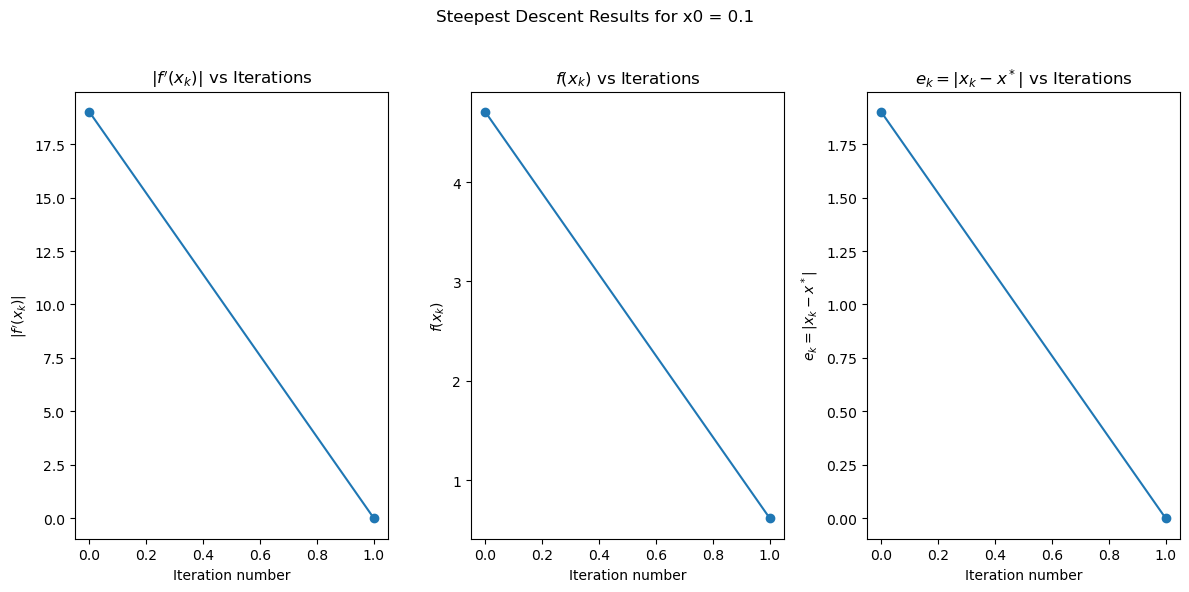

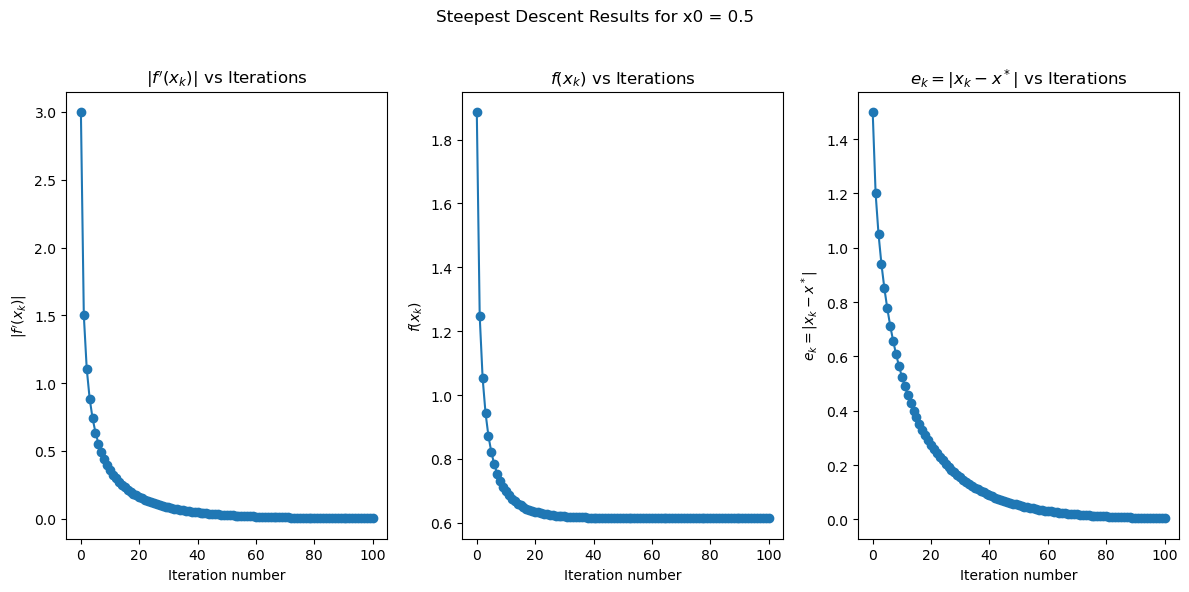

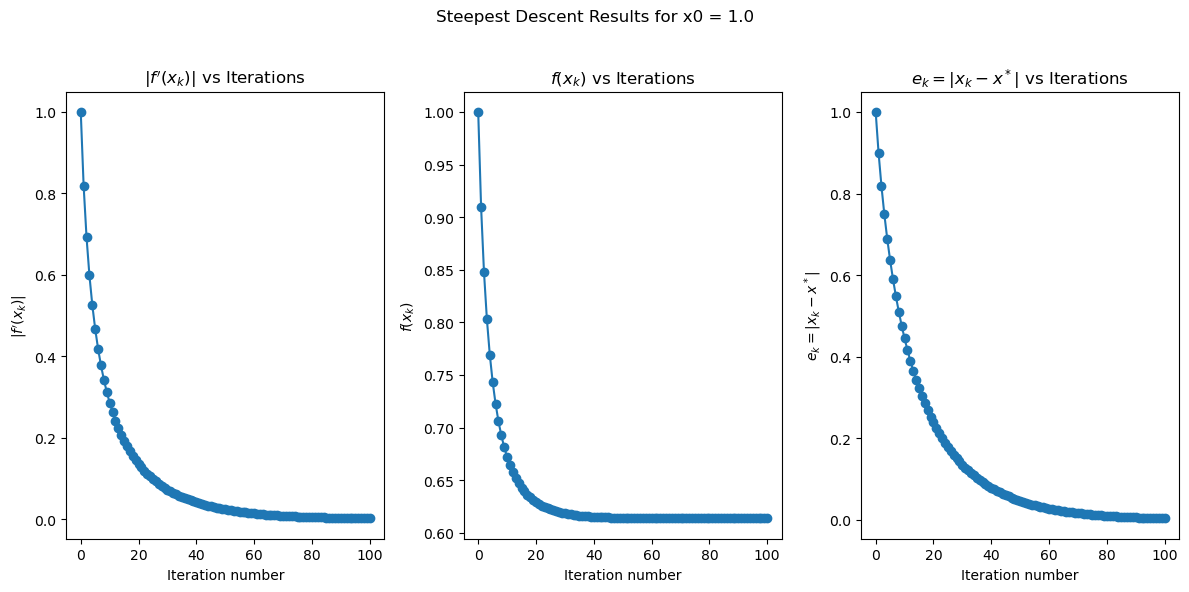

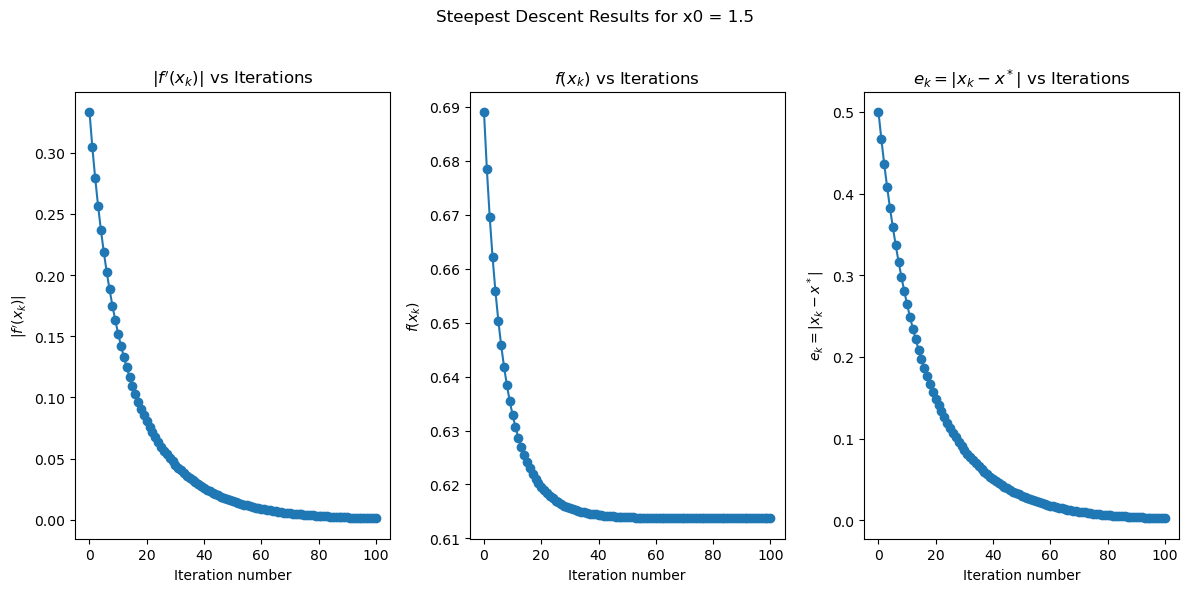

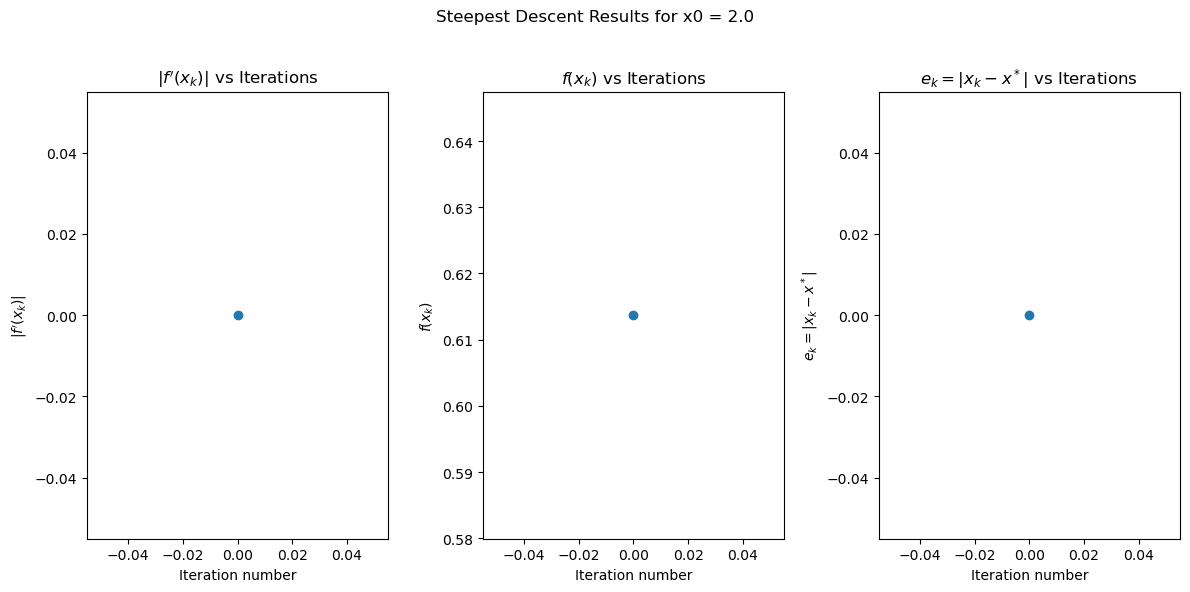

In [21]:
#################################### b ####################################

# Define different starting points
starting_points = [0.1, 0.5, 1.0, 1.5, 2.0]  # Example starting points
alpha = 0.1
mu = 2.0  # Example parameter for the PenFun1 function

# Loop through each starting point and run the optimization
for x0 in starting_points:
    # Run the steepest descent method for each x0
    xopt, stat = steepestdescent_method(alpha, PenFun1, x0, mu)

    # Extract iteration information
    iterations = stat["iter"]
    X_values = np.array(stat["X"]).flatten()
    F_values = np.array(stat["F"]).flatten()
    dF_values = np.array([np.linalg.norm(df, np.inf) for df in stat["dF"]])
    ek_values = np.abs(X_values - mu)  # Since x* = mu in this problem

    # Plot |f′(xk)|, f(xk), and ek as functions of the iteration number
    plt.figure(figsize=(12, 6))
    plt.suptitle(f"Steepest Descent Results for x0 = {x0}")

    # Plot |f′(xk)|
    plt.subplot(1, 3, 1)
    plt.plot(range(iterations + 1), dF_values, marker='o')
    plt.title(r"$|f'(x_k)|$ vs Iterations")
    plt.xlabel('Iteration number')
    plt.ylabel(r"$|f'(x_k)|$")

    # Plot f(xk)
    plt.subplot(1, 3, 2)
    plt.plot(range(iterations + 1), F_values, marker='o')
    plt.title(r"$f(x_k)$ vs Iterations")
    plt.xlabel('Iteration number')
    plt.ylabel(r"$f(x_k)$")

    # Plot ek = |xk − x*|
    plt.subplot(1, 3, 3)
    plt.plot(range(iterations + 1), ek_values, marker='o')
    plt.title(r"$e_k = |x_k − x^*|$ vs Iterations")
    plt.xlabel('Iteration number')
    plt.ylabel(r"$e_k = |x_k − x^*|$")

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.show()


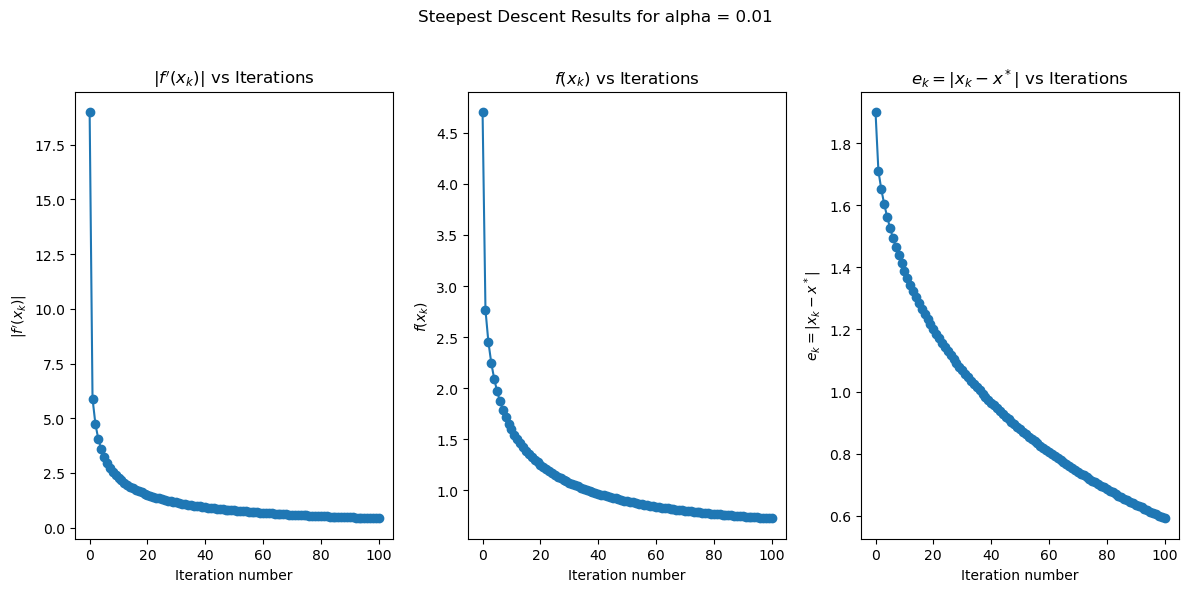

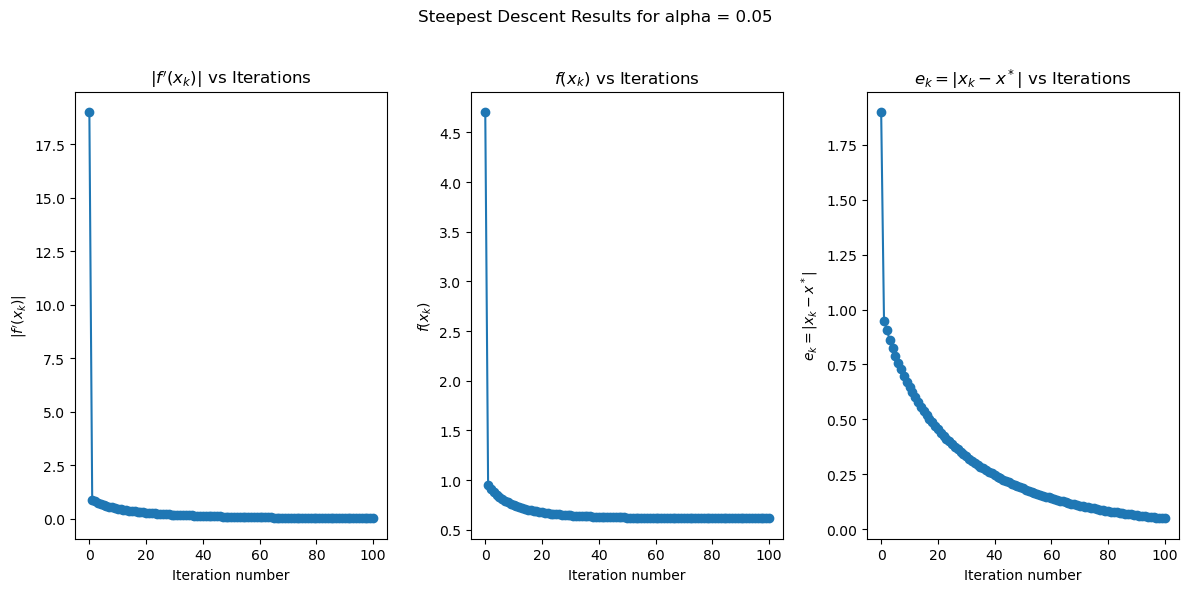

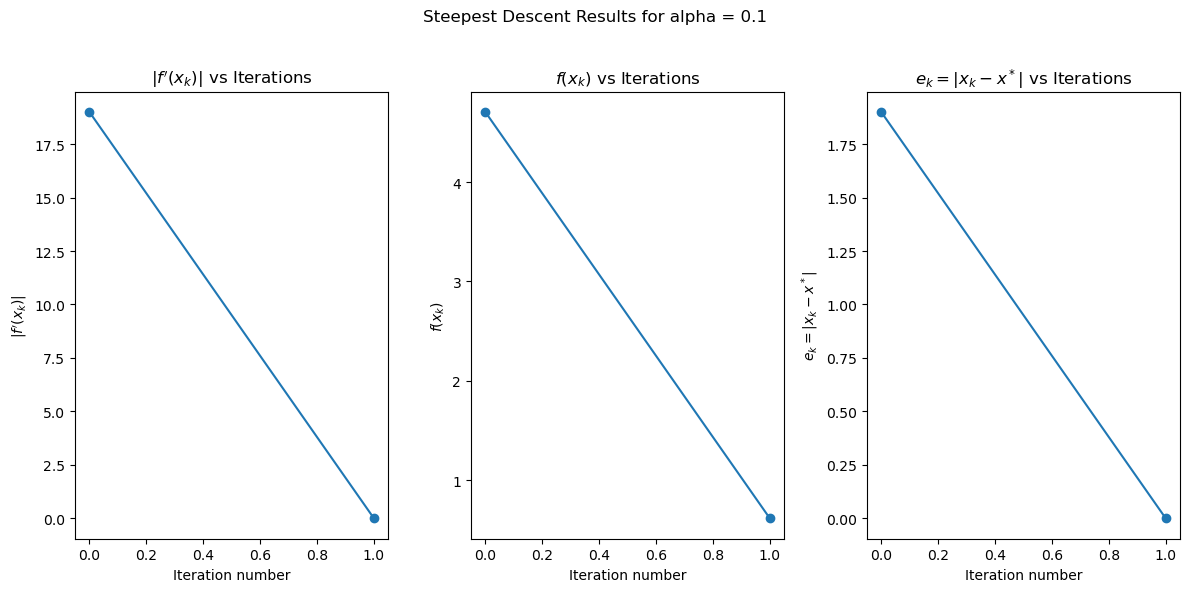

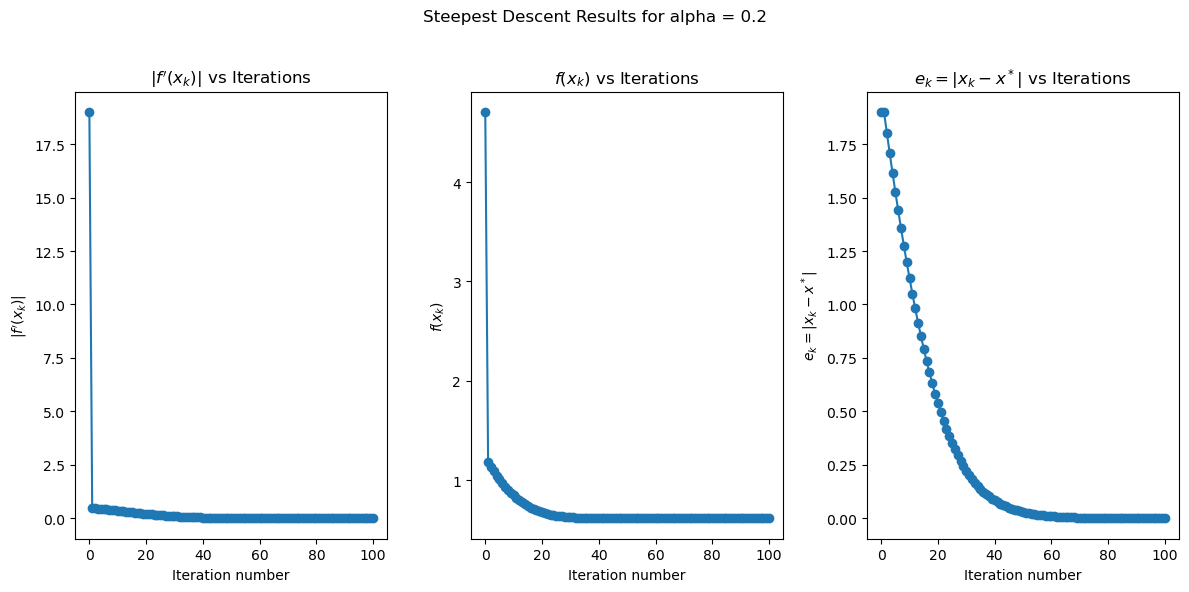

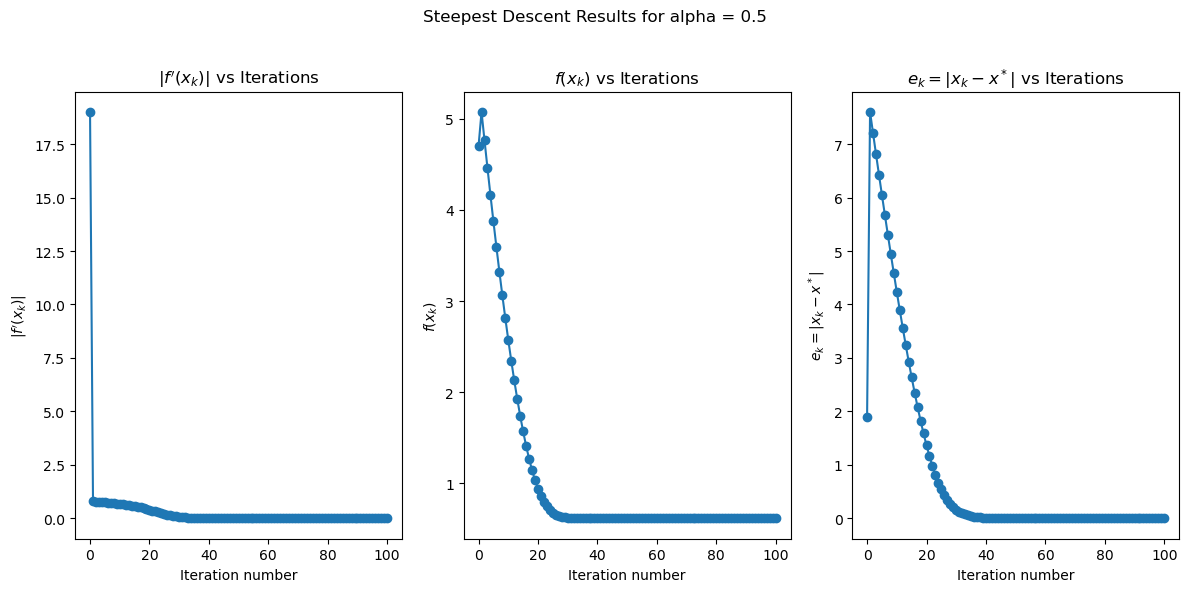

In [22]:
#################################### c ####################################

# Define different step lengths
step_lengths = [0.01, 0.05, 0.1, 0.2, 0.5]  # Example step lengths
x0 = 0.1  # Fixed starting point
mu = 2.0  # Example parameter for the PenFun1 function

# Loop through each step length and run the optimization
for alpha in step_lengths:
    # Run the steepest descent method for each alpha
    xopt, stat = steepestdescent_method(alpha, PenFun1, x0, mu)

    # Extract iteration information
    iterations = stat["iter"]
    X_values = np.array(stat["X"]).flatten()
    F_values = np.array(stat["F"]).flatten()
    dF_values = np.array([np.linalg.norm(df, np.inf) for df in stat["dF"]])
    ek_values = np.abs(X_values - mu)  # Since x* = mu in this problem

    # Plot |f′(xk)|, f(xk), and ek as functions of the iteration number
    plt.figure(figsize=(12, 6))
    plt.suptitle(f"Steepest Descent Results for alpha = {alpha}")

    # Plot |f′(xk)|
    plt.subplot(1, 3, 1)
    plt.plot(range(iterations + 1), dF_values, marker='o')
    plt.title(r"$|f'(x_k)|$ vs Iterations")
    plt.xlabel('Iteration number')
    plt.ylabel(r"$|f'(x_k)|$")

    # Plot f(xk)
    plt.subplot(1, 3, 2)
    plt.plot(range(iterations + 1), F_values, marker='o')
    plt.title(r"$f(x_k)$ vs Iterations")
    plt.xlabel('Iteration number')
    plt.ylabel(r"$f(x_k)$")

    # Plot ek = |xk − x*|
    plt.subplot(1, 3, 3)
    plt.plot(range(iterations + 1), ek_values, marker='o')
    plt.title(r"$e_k = |x_k − x^*|$ vs Iterations")
    plt.xlabel('Iteration number')
    plt.ylabel(r"$e_k = |x_k − x^*|$")

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.show()